# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Import cleaned data

In [2]:
# Importing cleaned data
data = pd.read_csv('data/dementia_patients_cleaned_1.csv')
data.head(5)

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Age,Education_Level,Dominant_Hand,...,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,True,0.084974,98,96.230743,36.224852,57.563978,36.421028,60,2,Left,...,False,2,False,1,True,10,Low-Carb Diet,False,True,0
1,False,0.016973,78,93.032122,36.183874,56.832335,31.157633,61,3,Right,...,False,1,True,3,True,1,Low-Carb Diet,False,True,1
2,False,0.009000,89,93.566504,37.326321,59.759066,37.640435,69,2,Right,...,True,1,False,3,True,8,Mediterranean Diet,False,True,0
3,False,0.086437,60,93.906510,37.030620,58.266471,50.673992,78,3,Left,...,True,0,False,2,True,5,Balanced Diet,False,True,1
4,True,0.150747,67,97.508994,36.062121,67.705027,27.810601,77,3,Right,...,True,0,True,2,True,0,Low-Carb Diet,True,True,1


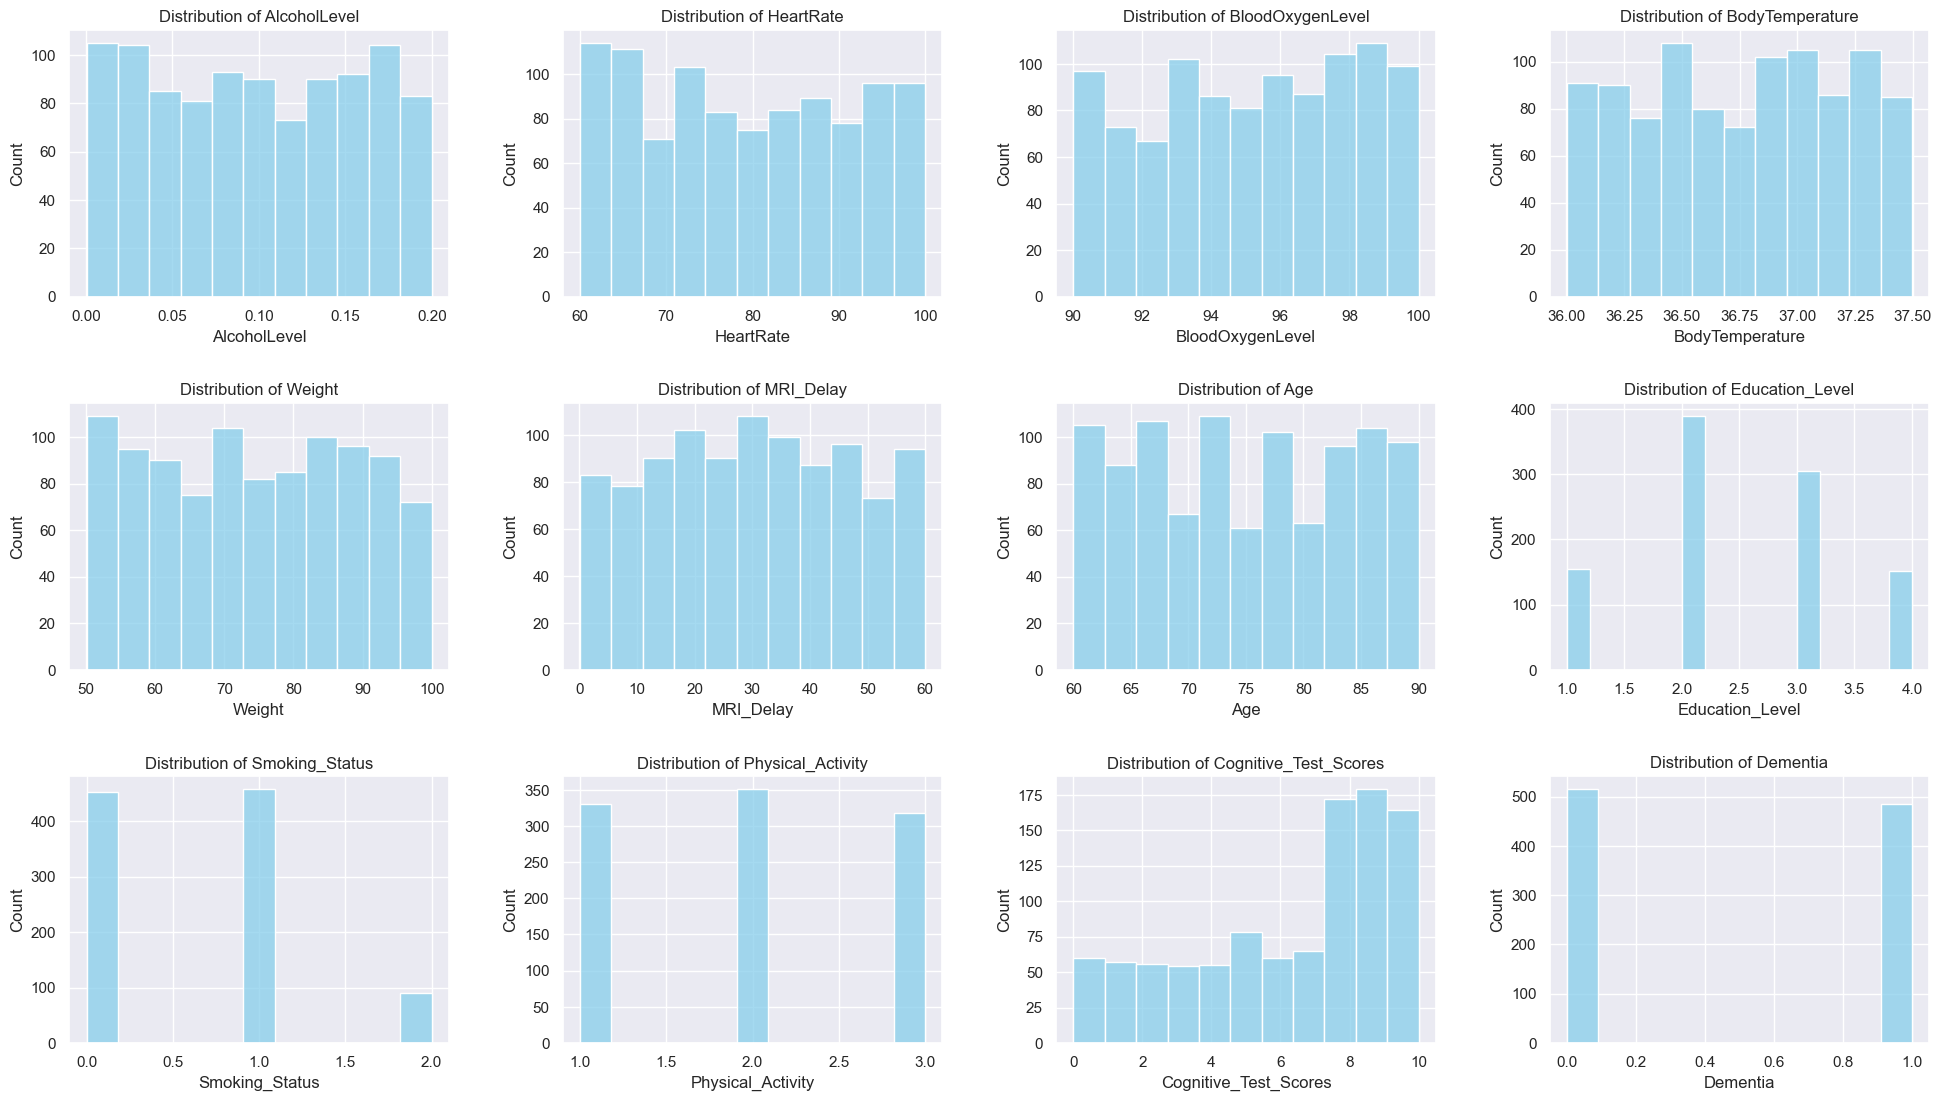

In [3]:
# Histograms for all numerical variables, with adjusted figure size
num_vars = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(24, 18))
for i, var in enumerate(num_vars):
    plt.subplot(4, 4, i + 1)  # Adjusted the grid to accommodate more space
    sb.histplot(data[var], kde=False, color='skyblue')
    plt.title(f'Distribution of {var}')
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjusted spacing
plt.show()

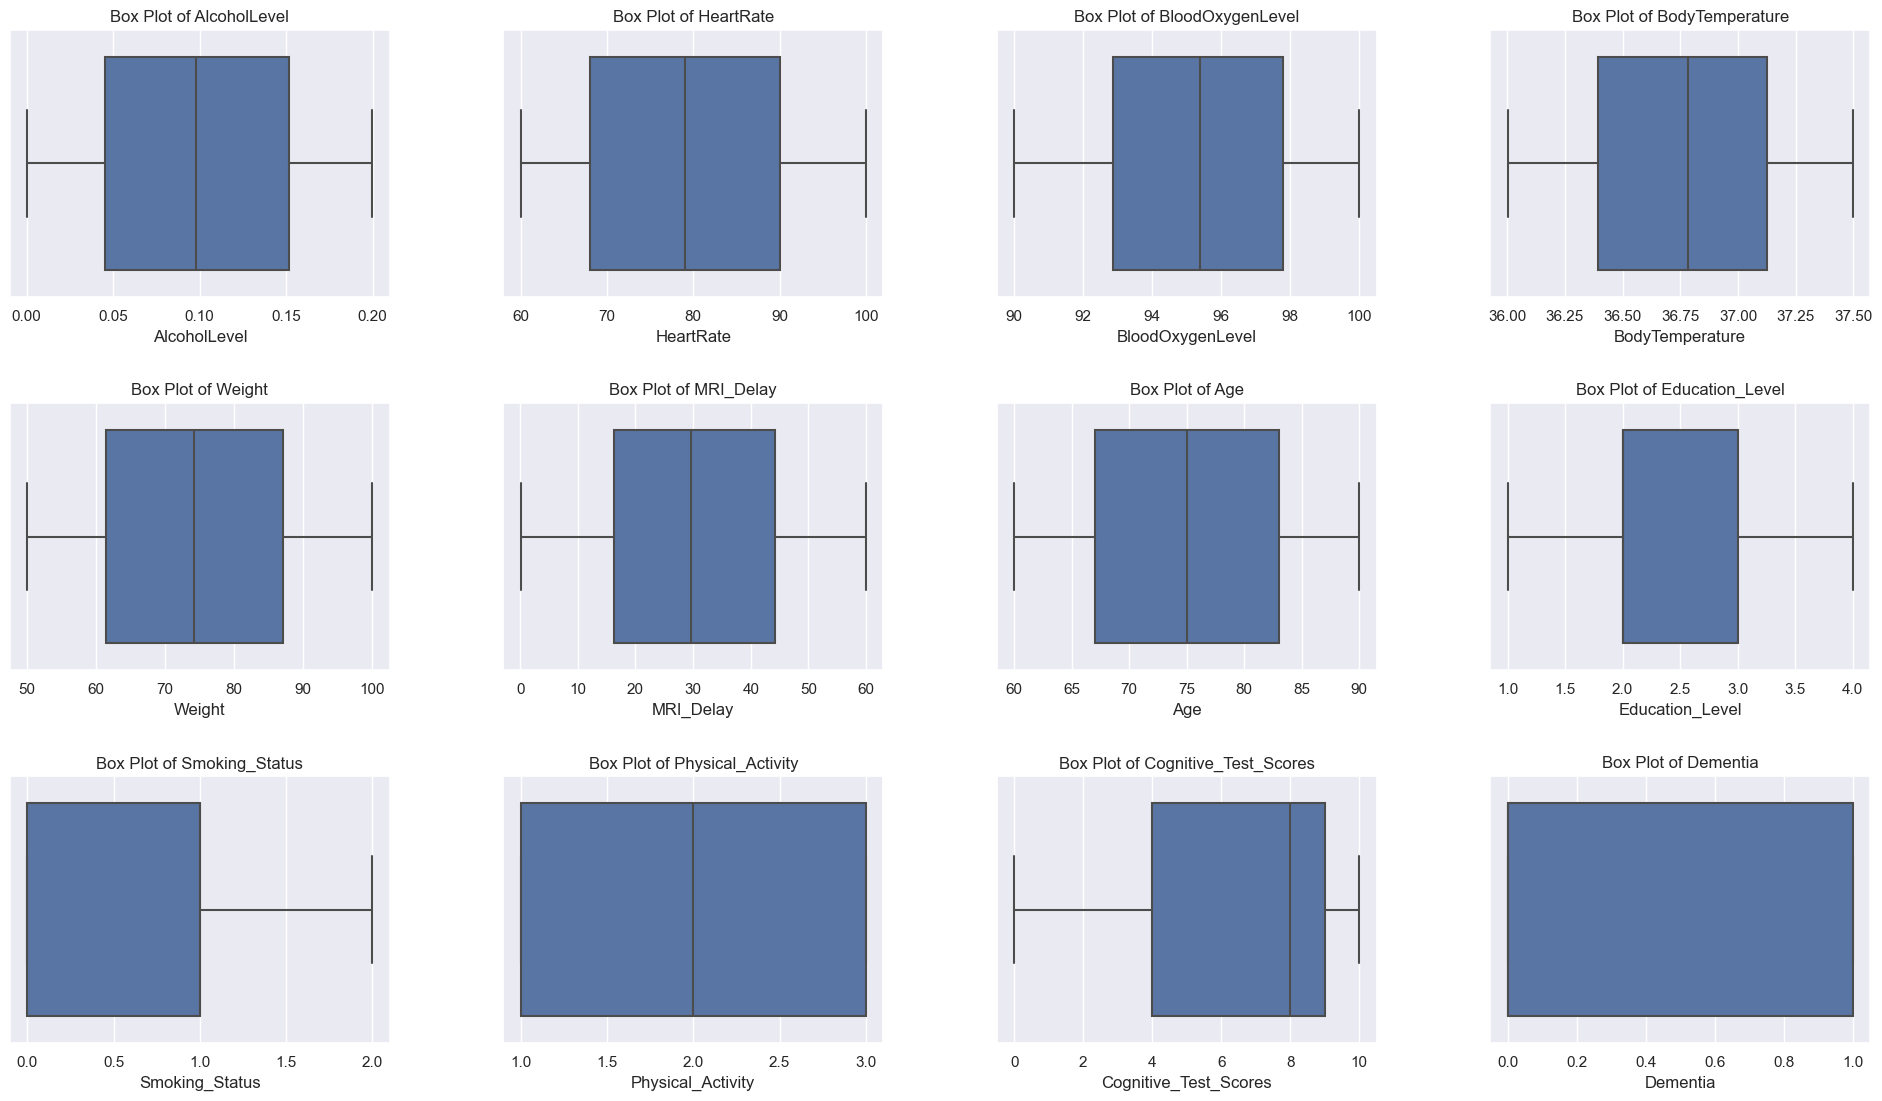

In [4]:
# Box plots for variables of interest to identify outliers, with adjusted parameters
plt.figure(figsize=(24, 18))
for i, var in enumerate(num_vars):
    plt.subplot(4, 4, i + 1)
    sb.boxplot(x=data[var])
    plt.title(f'Box Plot of {var}')
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjusted spacing
plt.show()

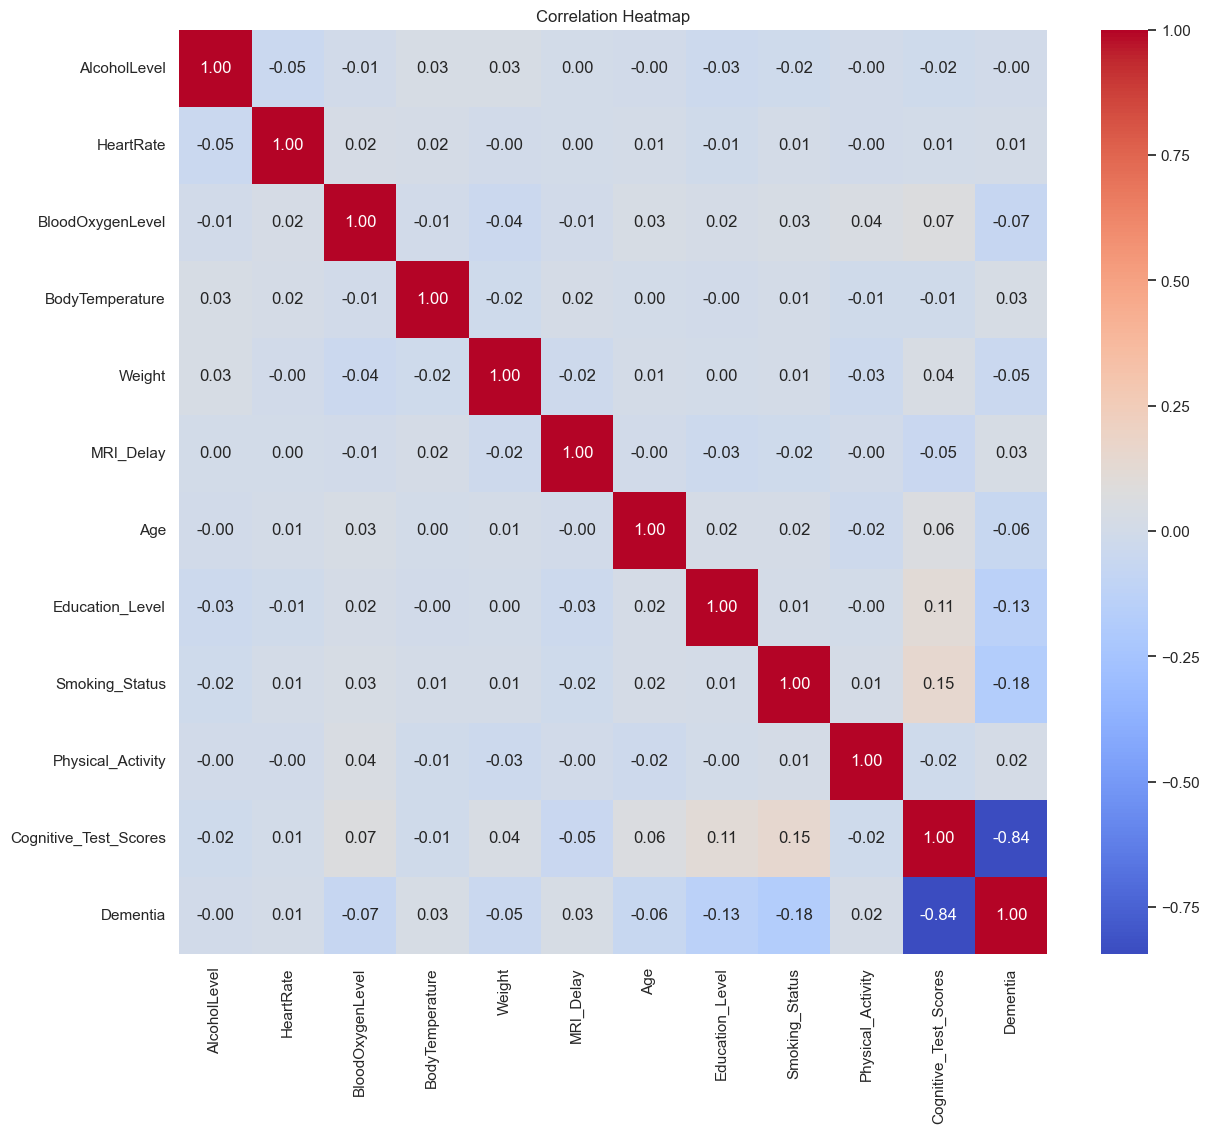

In [5]:
# Correlation heatmap, only considering numeric data
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(14, 12))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# Remove 'AlcoholLevel' from the clean data and save into a csv file
data = data.drop('AlcoholLevel', axis = 1)
dementia_patients_cleaned_without_AlcoholLevel = data
dementia_patients_cleaned_without_AlcoholLevel.to_csv('data/dementia_patients_cleaned_2_After EDA.csv', index=False )